In [1]:
import pathlib
import dill
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
path = pathlib.Path('exp_results')
files = list(path.glob("*.dill"))

In [3]:
def parse_file(f):
    split_name = f.name.split("_")
    noise = float(split_name[1])
    dt = float(split_name[-1][:-5])
    with open(f,'rb') as path:
        result = pickle.load(path)
    d = result['coeff_mets']
    d.update(result['data_mets'])
    d['noise'] = np.around(np.array(noise),3)
    d['dt'] = np.around(np.array(dt),3)
    return d

In [4]:
results = [parse_file(f) for f in files]

In [5]:
df = pd.DataFrame(results)
df = df.astype('float')

In [6]:
df

,precision,recall,f1,coeff_rel_l2,coeff_rmse,coeff_mae,mse,rmse,mae,max_abs_error,normalized_mse,relative_l2_error,noise,dt
0,0.750000,0.857143,0.800000,1.894451e-01,1.090537e+00,3.773343e-01,4.344053e+01,6.590943,4.771687,35.955471,1.116624e-02,1.056536e-01,2.0,0.18
1,1.000000,1.000000,1.000000,1.181064e-07,6.798766e-07,1.807289e-07,2.140301e-11,0.000005,0.000003,0.000035,5.501572e-15,7.416076e-08,0.0,0.06
2,0.875000,1.000000,0.933333,1.885273e-02,1.085253e-01,2.741178e-02,2.355412e-01,0.485326,0.376265,1.623240,6.054508e-05,7.779831e-03,4.0,0.02
3,0.875000,1.000000,0.933333,6.481476e-02,3.731047e-01,1.143560e-01,8.903804e+00,2.983924,2.065637,13.887846,2.288693e-03,4.783266e-02,4.0,0.04
4,0.875000,1.000000,0.933333,4.511981e-02,2.597312e-01,7.985745e-02,4.429319e+00,2.104595,1.454168,9.879710,1.138541e-03,3.373690e-02,2.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.583333,1.000000,0.736842,7.247568e-01,4.172047e+00,1.036411e+00,3.433773e+01,5.859841,4.006664,33.635475,8.826398e-03,9.393394e-02,6.0,0.20
93,0.388889,1.000000,0.560000,7.093241e-01,4.083209e+00,1.669667e+00,7.281304e+02,26.983891,17.244111,176.208720,1.871634e-01,4.325549e-01,6.0,0.12
94,1.000000,1.000000,1.000000,4.551061e-07,2.619808e-06,7.918526e-07,1.406701e-09,0.000038,0.000027,0.000148,3.615878e-13,6.012259e-07,0.0,0.10
95,0.875000,1.000000,0.933333,1.179747e-01,6.791188e-01,2.057904e-01,2.713220e+01,5.208858,3.626315,23.537955,6.974241e-03,8.349861e-02,12.0,0.04


<Axes: xlabel='noise', ylabel='dt'>

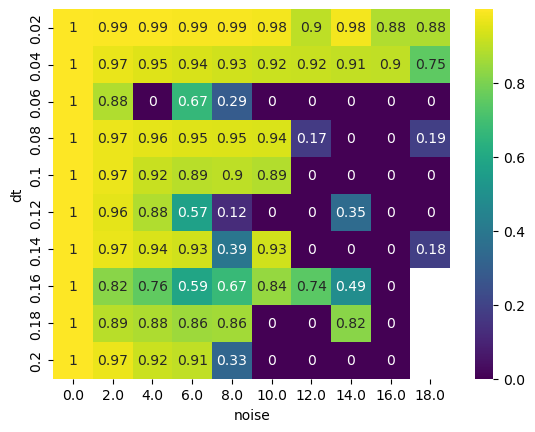

In [7]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='relative_l2_error')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

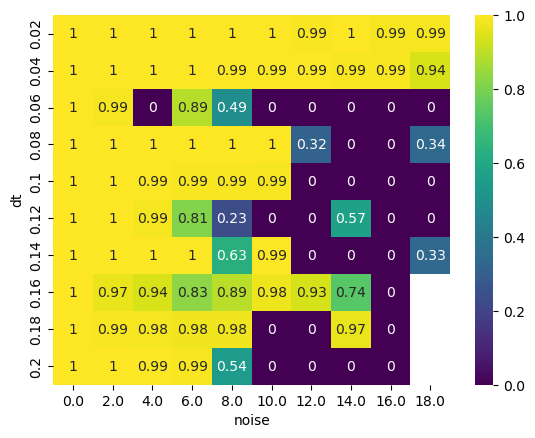

In [8]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='normalized_mse')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

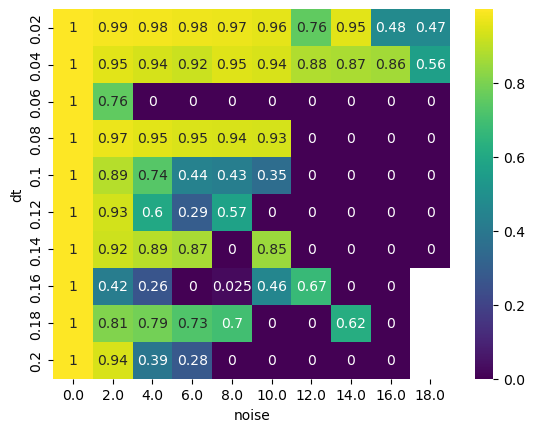

: 

In [ ]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='coeff_rel_l2')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")
